<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.request import urlretrieve
import os.path

# Get painting's info

In [2]:
def get_soup(url):
    
    req = requests.get(url)

    html_doc = req.text

    soup = BeautifulSoup(html_doc)
    
    return soup

In [3]:
def get_creator_name(article):
    creator = article.find('span', {'itemprop':'name'})
    if creator is not None:
        creator = re.sub('<.*?>', "", str(creator))
        creator = re.sub('\n', "", str(creator)).strip()
    return creator

In [4]:
def get_painting_name(article):
    name = article.find('h3')
    if name is not None:
        name = re.sub('<.*?>', "", str(name))
        name = re.sub('\xa0', " ", str(name))
        name = re.sub('\n', "", str(name)).strip()
    return name

In [5]:
def get_painting_date(article):
    date = article.find('span', {'itemprop':'dateCreated'})
    if date is not None:
        date = re.sub('<.*?>', "", str(date))
        date = re.sub('\n', "", str(date)).strip()
    return date

In [6]:
def get_painting_place(article):
    place = article.find('span', {'itemprop':'locationCreated'})
    if place is not None:
        place = re.sub('<.*?>', "", str(place))
        place = re.sub('\n', "", str(place)).strip()
    return place

In [7]:
def get_painting_style(article):
    style = article.find_all('li')
    
    for li in style:
        if 'Style' in str(li):
            style = li
            style = re.sub('<.*?>', "", str(style))
            style = re.sub('\n', "", str(style))
            style = style.split(':')[1].strip()
            break
        else:
            style = None
        
    return style

In [8]:
def get_painting_genre(article):
    genre = article.find('span', {'itemprop':'genre'})
    if genre is not None:
        genre = re.sub('<.*?>', "", str(genre))
        genre = re.sub('\n', "", str(genre)).strip()
    return genre

In [9]:
def get_painting_media(article):
    media = article.find_all('li')
    
    for li in media:
        if 'Media' in str(li):
            media = li
            media = re.sub('<.*?>', "", str(media))
            media = re.sub('\n', "", str(media))
            media = media.split(':')[1].strip()
            break
        else:
            media = None
        
    return media

In [10]:
def get_painting_current_location(article):
    location = article.find_all('li')
    
    for li in location:
        if 'Location' in str(li):
            location = li
            location = re.sub('<.*?>', "", str(location))
            location = re.sub('\n', "", str(location))
            location = location.split(':')[1].strip()
            break
        else:
            location = None
        
    return location

In [11]:
def get_painting_dimensions(article):
    dimensions = article.find_all('li')
    
    for li in dimensions:
        if 'Dimensions' in str(li):
            dimensions = li
            dimensions = re.sub('<.*?>', "", str(dimensions))
            dimensions = re.sub('\n', "", str(dimensions))
            dimensions = dimensions.split(':')[1].strip()
            break
        else:
            dimensions = None
        
    return dimensions

In [12]:
def get_info_from_soup(soup):

    article = soup.find('article')
            
    creator = get_creator_name(article)    
    name = get_painting_name(article)
    date = get_painting_date(article)    
    place = get_painting_place(article)    
    style = get_painting_style(article)    
    genre = get_painting_genre(article)    
    media = get_painting_media(article)    
    location = get_painting_current_location(article)    
    dimensions = get_painting_dimensions(article)
    
    info = [creator, name, date, place, style, genre, media, location, dimensions]

    return info

# Downloading the painting

In [13]:
def painting_downloader(soup, painting_name):
    
    get_img_wrapper = soup.find('img', {'itemprop':'image'})
    
    img_url = get_img_wrapper.get('src')

    extension = img_url.split('.')[-1]
    output_name = painting_name.replace(' ','-')
    output_name = output_name.lower()
    filename = output_name + '.' + extension
    save_path = 'paintings/'+filename
    
    if os.path.isfile(save_path):
        return print("A file with the name '{}' already exists.".format(filename))
    else :      
        urlretrieve(img_url, save_path)
        return print("Painting downloaded as '{}'".format(filename))

In [14]:
url_rand = 'https://www.wikiart.org/en/App/Painting/random'
soup_rand = get_soup(url_rand)
info = get_info_from_soup(soup_rand)
painting_downloader(soup_rand,info[1])

Painting downloaded as 'the-swedish-dyehouse.jpg'


# Look

In [42]:
url_mona = 'https://www.wikiart.org/en/leonardo-da-vinci/mona-lisa'
soup_mona = get_soup(url_mona)
info = get_info_from_soup(soup_mona)
painting_downloader(soup_mona,info[1])
# url_apelles = 'https://www.wikiart.org/en/sandro-botticelli/calumny-of-apelles'
# soup_apelles = get_soup(url_apelles)

# url = 'https://www.wikiart.org/en/leonardo-da-vinci/the-virgin-of-the-rocks'
# soup_virgin = get_soup(url)

Painting downloaded as 'mona-lisa.jpg'


In [41]:
print(get_info_from_soup(soup_mona))
# print(get_info_from_soup(soup_apelles))
# print(get_info_from_soup(soup_virgin))

['Leonardo da Vinci', 'Mona Lisa', '1504', 'Florence', 'High Renaissance', 'portrait', 'oil,panel', 'Louvre, Paris, France', '53 x 77 cm']


In [14]:
N = 10
keys = ['creator', 'name', 'year', 'place', 'style', 'genre', 'media', 'location', 'dimension']
paintings_info_list = [[0 for x in keys] for y in range(N)]

url_rand = 'https://www.wikiart.org/en/App/Painting/random'
for i in range(N):
    soup_rand = get_soup(url_rand)
    paintings_info_list[i] = get_info_from_soup(soup_rand)

df = pd.DataFrame(paintings_info_list, columns=keys)

NameError: name 'pd' is not defined

In [153]:
df['creator']


Roger Weik                   8
Gustave Dore                 3
Richard Jack                 3
Vincent van Gogh             2
Nicholas Roerich             2
Wojciech Siudmak             2
Yamamura Toyonari            1
Sigmar Polke                 1
Max Gubler                   1
Leon Berkowitz               1
William Merritt Chase        1
Giuseppe Arcimboldo          1
Tess Jaray                   1
James Charles                1
Julian Schnabel              1
Antonio Carneiro             1
William Hart                 1
Mary Pratt                   1
Paolo Veronese               1
Vladimir Borovikovsky        1
Andre Lanskoy                1
Dante Gabriel Rossetti       1
Giacomo Balla                1
Raoul Ubac                   1
Vasile Kazar                 1
Claude Lorrain               1
Tea Jorjadze                 1
Boris Kustodiev              1
Henri de Toulouse-Lautrec    1
Karl Schrag                  1
                            ..
Aleksandr Deyneka            1
Ernst Lu

In [152]:
df.groupby('creator').filter(lambda x: x['name'].count() >= 2)

,creator,name,year,place,style,genre,media,location,dimension
1,Gustave Dore,The Embarkation of the Souls,None,None,Romanticism,illustration,None,None,None
2,Roger Weik,"""Infusion"" 2016",2016,Los Angeles,Abstract Expressionism,abstract,None,None,None
11,Wojciech Siudmak,Three Graces,None,None,Fantastic Realism,symbolic painting,None,None,None
30,Richard Jack,The Swedish Dyehouse,None,None,Impressionism,genre painting,None,None,None
35,Gustave Dore,David Shows Saul How He Spared His Life,None,None,Romanticism,religious painting,None,None,None
39,Vincent van Gogh,Stooping Woman in Landscape,1883,None,Realism,sketch and study,"ink,paper","Van Gogh Museum, Amsterdam, Netherlands",None
42,Roger Weik,"""Infusion"" 2016",2016,Los Angeles,Abstract Expressionism,abstract,None,None,None
48,Richard Jack,The Swedish Dyehouse,None,None,Impressionism,genre painting,None,None,None
62,Roger Weik,"""Infusion"" 2016",2016,Los Angeles,Abstract Expressionism,abstract,None,None,None
64,Roger Weik,"""Infusion"" 2016",2016,Los Angeles,Abstract Expressionism,abstract,None,None,None


In [139]:
repeated.filter(lambda x: x['creator'].count() >= 2)

pandas.core.series.Series

# Creating a dataset

In [15]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
info

['Richard Jack',
 'The Swedish Dyehouse',
 None,
 None,
 'Impressionism',
 'genre painting',
 None,
 None,
 None]

In [16]:
output_name = info[1].replace(' ','-')
output_name = output_name.lower()
file_path = 'paintings/'+output_name+'.jpg'
img = Image.open(file_path)

# file_path = folder + "circles/" + filename + "(" + str(i) + ")" + extension
# img = Image.open(file_path)

In [17]:
raw = np.asarray(img)

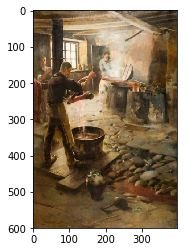

In [18]:
plt.imshow(raw)

In [65]:
size = [36, 36]
resized = ImageOps.fit(raw, size, Image.ANTIALIAS)

TypeError: 'int' object is not subscriptable

In [ ]:
im.thumbnail(size, Image.ANTIALIAS)